In [1]:
from sympy import Matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
n = 10
p = 3
l1 = list(range(n))
l2 = [(i + p) % n for i in range(n)]
for a,b in zip(l1, l2):
    print(f"{a} <- {b}")

0 <- 3
1 <- 4
2 <- 5
3 <- 6
4 <- 7
5 <- 8
6 <- 9
7 <- 0
8 <- 1
9 <- 2


In [2]:
# Define your matrix
matrix = Matrix([[1, 2], [3, 4]])

# Invert the matrix
inverse_matrix = matrix.inv()

print("Inverse Matrix:")
print(inverse_matrix)

Inverse Matrix:
Matrix([[-2, 1], [3/2, -1/2]])


In [3]:
from typing import Callable

def p(i: int, j: int) -> list:
    """
    Returns the list of tuples of (i, j, weight) for pixels that contribute to the output pixel
    """
    if i == 0 and j == 0:
        return [(i, j, 1)]
    elif i == 0:
        return [(i, j, 1), (i, j-1, -1)]
    elif j == 0:
        return [(i, j, 1), (i-1, j, -1)]
    else:
        return [(i, j, 1), (i-1, j, -1), (i, j-1, -1), (i-1, j-1, 1)]

def sparse_matrix(n: int, p: Callable[[int, int], list]) -> Matrix:
    """
    Generate a sympy matrix for a kernel to be applied to an n x n image.

    This means that the image is represented as a n^2 column vector, and the
    sparse matrix A is an n^2 x n^2 matrix such that A * image = transformed_image.

    Formula for the linear transformation is given by the function p(i, j).

    Because the image is a column vector arranged in row-major order, the matrix
    is arranged such that each row corresponds the linear combination of pixels
    that make up the output pixel at that position. Thus, the indices of the vector
    are mapped as follows:
        index = i * n + j

    Conversely:
        i = index // n
        j = index % n
    """
    # Initialize the matrix with zeros
    matrix = Matrix.zeros(n**2, n**2)

    # Iterate over each pixel in row-major order
    for index in range(n**2):
        i = index // n
        j = index % n

        # Iterate over each pixel that contributes to the output pixel
        for (i_, j_, weight) in p(i, j):
            # Convert the pixel coordinates to an index
            index_ = i_ * n + j_

            # Set the value in the matrix
            matrix[index, index_] = weight

    return matrix

In [4]:
m = sparse_matrix(4, p)
m

Matrix([
[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
[-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
[ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
[ 0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
[-1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
[ 1, -1,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
[ 0,  1, -1,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, 0],
[ 0,  0,  1, -1,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0, 0],
[ 0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, 0],
[ 0,  0,  0,  0,  1, -1,  0,  0, -1,  1,  0,  0,  0,  0,  0, 0],
[ 0,  0,  0,  0,  0,  1, -1,  0,  0, -1,  1,  0,  0,  0,  0, 0],
[ 0,  0,  0,  0,  0,  0,  1, -1,  0,  0, -1,  1,  0,  0,  0, 0],
[ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0, 0],
[ 0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0, -1,  1,  0, 0],
[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0, -1,  1, 0],
[ 0,  0,  0,  0,

In [5]:
# print latex of matrix m
from sympy import latex
print(latex(m))

\left[\begin{array}{cccccccccccccccc}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\-1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\-1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & -1 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 1 & -1 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1 & -1 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & -1 & 1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & -1 & 1 &

In [6]:
m.inv()

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [7]:
print(latex(m.inv()))

\left[\begin{array}{cccccccccccccccc}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 1 & 0 & 1 & 1 & 1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0\\1 & 1 & 1 & 0 & 1 & 1 & 1 & 0 & 1 & 1 & 1 & 0 & 1 & 1 & 1 & 0\\1 & 1 & 1 & 1 & 1 

In [8]:
def plot_histogram(filenames: list):
    # Create a new plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define some colors (you can expand this list if more are needed)
    colors = ['steelblue', 'firebrick', 'forestgreen']

    for idx, filename in enumerate(filenames):
        df = pd.read_csv(filename)
        df["percentage"] = df["frequency"] * 100
        # Plot the line
        ax.plot(df["pixel"], df["percentage"], label=filename.split('.')[0], color=colors[idx])
        # Fill the area under the line
        ax.fill_between(df["pixel"], df["percentage"], color=colors[idx], alpha=0.3)

    # Set ticks, labels, title, and other appearance features
    ax.set_xticks(np.arange(0, 257, 16))
    ax.set_xlabel('Valor do pixel', fontsize=14)
    ax.set_ylabel('Frequência percentual', fontsize=14)
    ax.set_title('Histogramas combinados', fontsize=16)
    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Format y-tick labels to display as percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:.2f}%'.format(val) for val in vals])

    # Display the legend
    ax.legend()

    plt.tight_layout()
    plt.savefig('combined_histogram.svg', format='svg', dpi=300)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'peppers.csv'

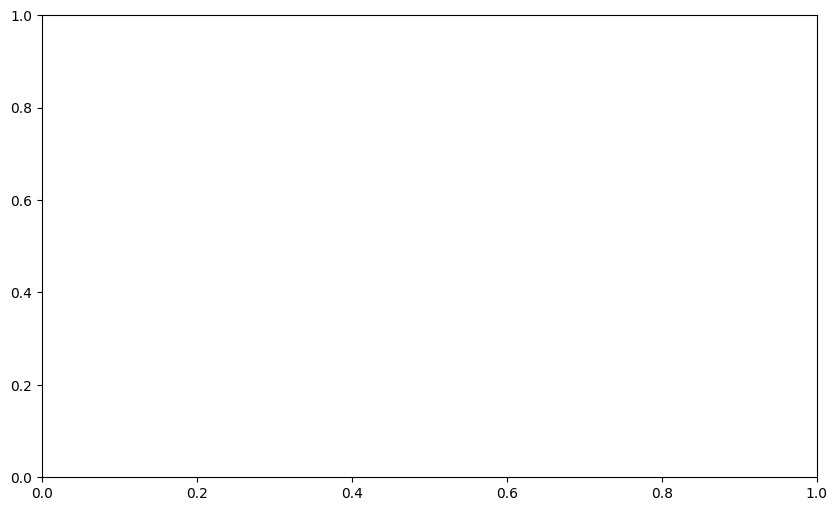

In [9]:
plot_histogram(["peppers.csv", "lena.csv", "baboon.csv"])